In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

**Laptop_ID** column has all unique values. It has no use to find out pattern. So it can be deleted.

In [7]:
df.drop(columns=['laptop_ID'],inplace=True)

In [8]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Our terget column is **Price_euros**

<AxesSubplot: xlabel='Price_euros', ylabel='Density'>

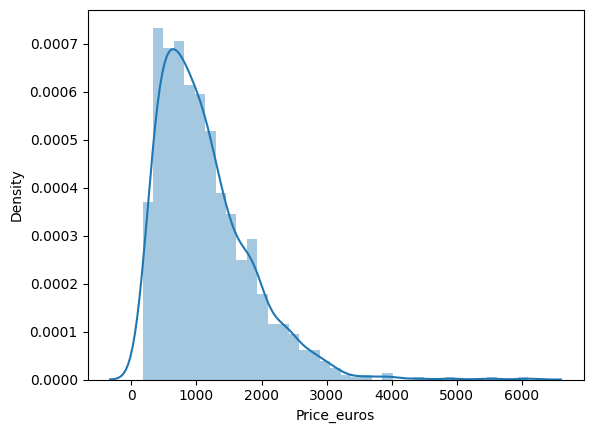

In [9]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['Price_euros'])

**NB:** The target column is left skewed so we can try log distribution of this column

<AxesSubplot: xlabel='Price_euros', ylabel='Density'>

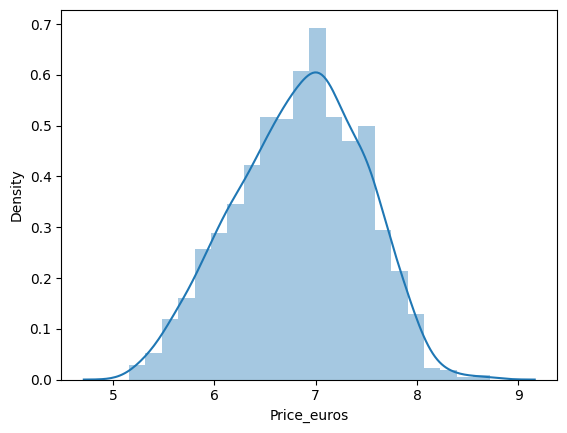

In [10]:
sns.distplot(np.log(df['Price_euros']))

**company vs Price_euros**

In [11]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

Text(0.5, 1.0, 'Laptop selling rate of companies')

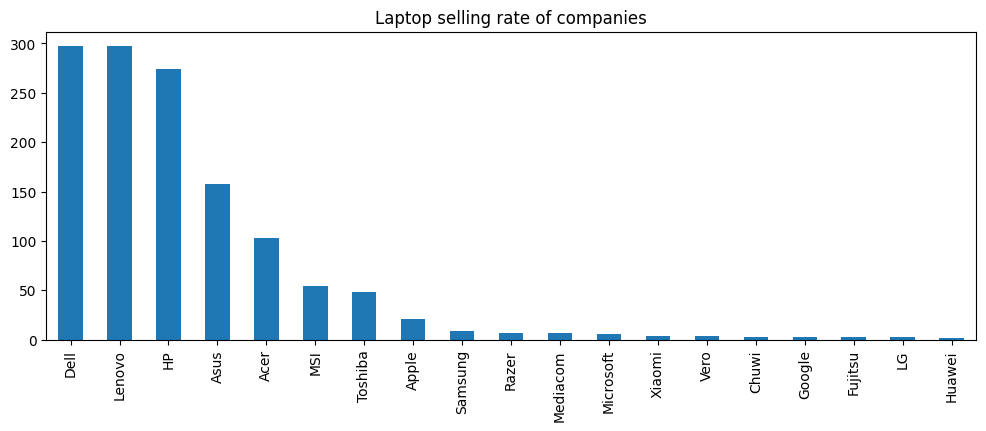

In [12]:
plt.figure(figsize=(12,4))
df['Company'].value_counts().plot(kind='bar')
plt.title('Laptop selling rate of companies')

Why **Lenovo Dell HP Asus Acer  MSI Toshiba** are sold highest?

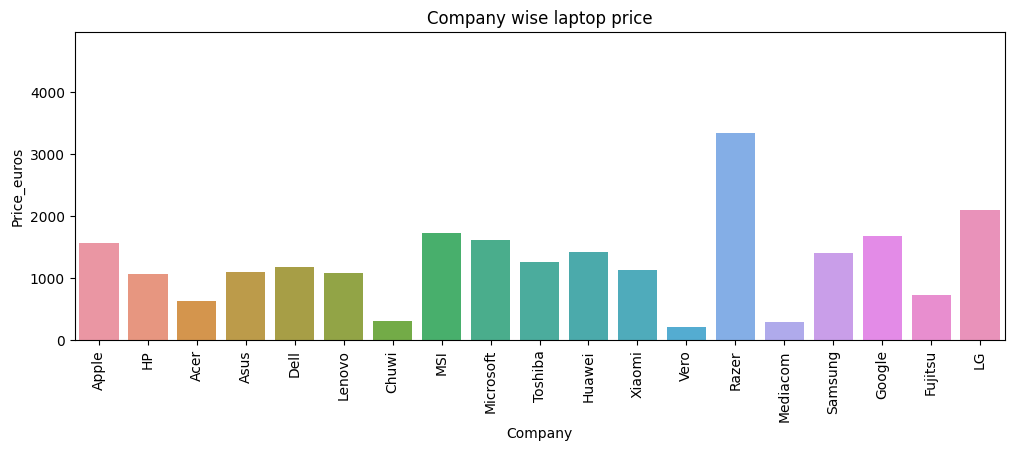

In [13]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['Company'],y=df['Price_euros'],errwidth=0)
plt.title('Company wise laptop price')
plt.xticks(rotation='vertical')
plt.show()

**Observation:** Medium price but good products are sold more

In [14]:
#product vs Price
df['Product'].value_counts()

XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: Product, Length: 618, dtype: int64

**NB:**Product has 618 different types against 1303 rows and has no pattern 

Text(0.5, 1.0, 'Rating of Product')

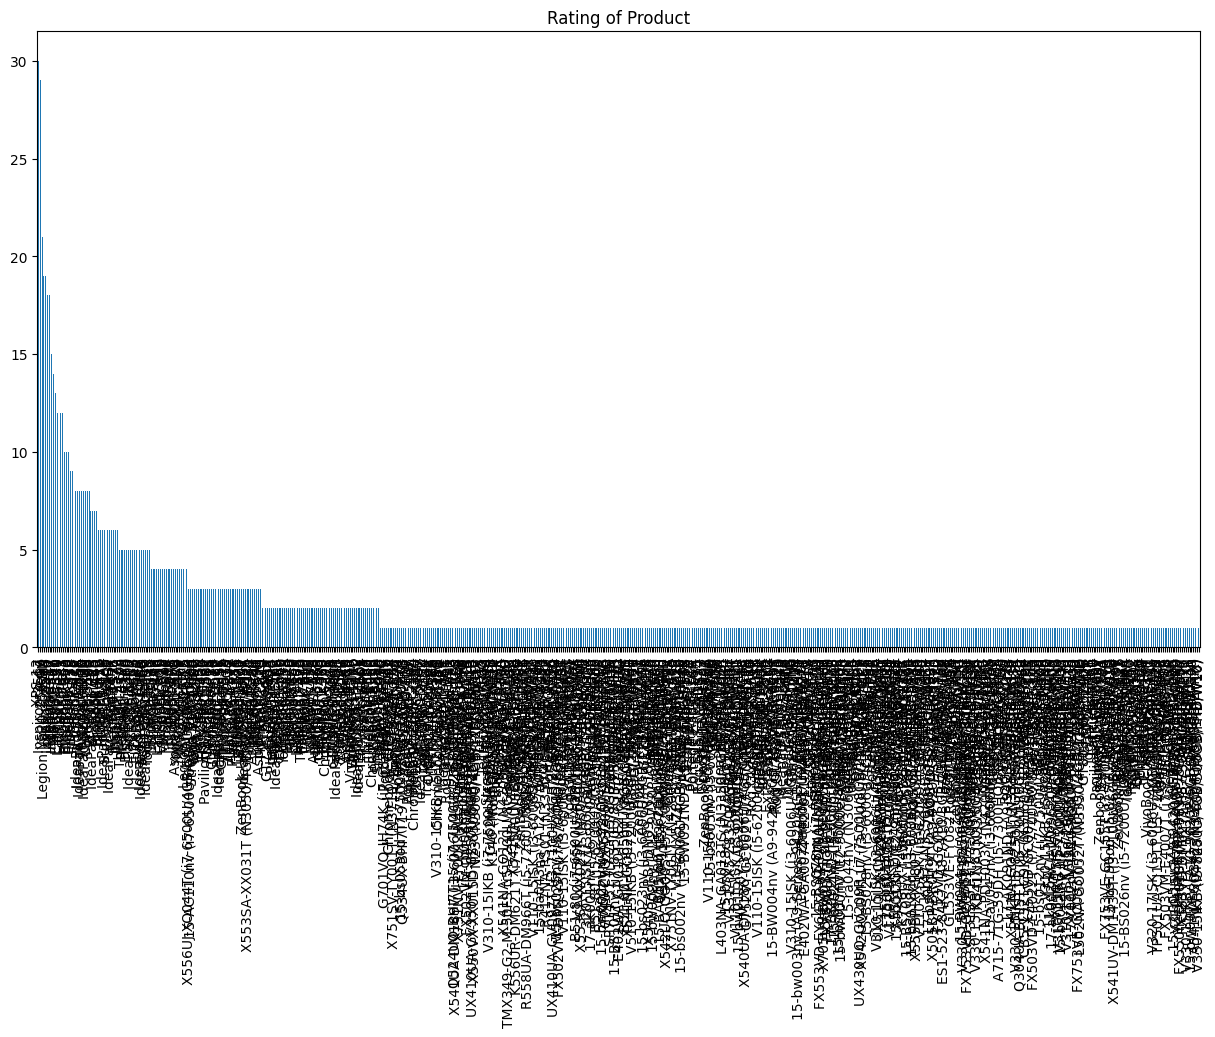

In [15]:
plt.figure(figsize=(15,8))
df['Product'].value_counts().plot(kind='bar')
plt.title('Rating of Product')

**NB:** This visualization is not good enough to understand 

In [16]:
a=df['Product'].value_counts()
a.head(50)

XPS 13                30
Inspiron 3567         29
250 G6                21
Legion Y520-15IKBN    19
Vostro 3568           19
Inspiron 5570         18
ProBook 450           18
Alienware 17          15
Inspiron 5567         14
Satellite Pro         13
EliteBook 840         12
Latitude 5580         12
ThinkPad X1           12
Aspire 3              12
Inspiron 7567         10
EliteBook 850         10
MacBook Pro           10
EliteBook 820          9
Inspiron 3552          9
XPS 15                 9
ProBook 470            8
IdeaPad 320-15ISK      8
IdeaPad Y700-15ISK     8
ThinkPad Yoga          8
Inspiron 5770          8
IdeaPad 320-15IKBN     8
Latitude 5480          8
Vostro 5568            8
ProBook 430            7
IdeaPad 320-17IKB      7
Aspire 5               7
Probook 440            7
ProBook 440            6
ThinkPad 13            6
ProBook 650            6
IdeaPad 320-15IAP      6
Surface Laptop         6
Notebook 9             6
IdeaPad 320-15AST      6
Rog Strix              6


In [17]:
df['Product_class']=df['Product'].apply(lambda x: x.split()[0])
df['Product_class'].value_counts()

Inspiron          141
IdeaPad            95
Aspire             63
ThinkPad           62
Latitude           52
                 ... 
15-BS026nv          1
15-bs190od          1
FX753VE-GC155T      1
X751NV-TY001T       1
FlexBook            1
Name: Product_class, Length: 226, dtype: int64

In [18]:
def product(inp):
    if inp == 'IdeaPad' or inp == 'Ideapad' or inp=='ThinkPad' or inp=='Thinkpad':
        return 'Pad'
    elif inp == 'Inspiron':
        return 'Inspiron'
    elif inp=='Aspire':
        return 'Aspire'
    elif inp=='Latitude':
        return 'Latitude'
    elif inp=='XPS':
        return 'XPS'
    elif inp=='Yoga':
        return 'Yoga'
    elif inp=='Vostro ':
        return 'Vostro '
    elif inp=='ProBook' or inp=='Probook' or inp=='EliteBook' or inp=='Elitebook' or inp=='Probook' or inp=='ProBook' or inp=='VivoBook' or inp=='Chromebook' or inp=='MacBook' or inp=='ZenBook' or inp=='Zenbook' or inp=='ZBook' or inp=='Notebook' or inp=='SmartBook' or inp=='Pixelbook' or inp=='VivoBook' :
        return 'book'
    else:
        return 'other'

In [19]:
df['Product_class']=df['Product_class'].apply(product)
a=df['Product_class'].value_counts()

<AxesSubplot: >

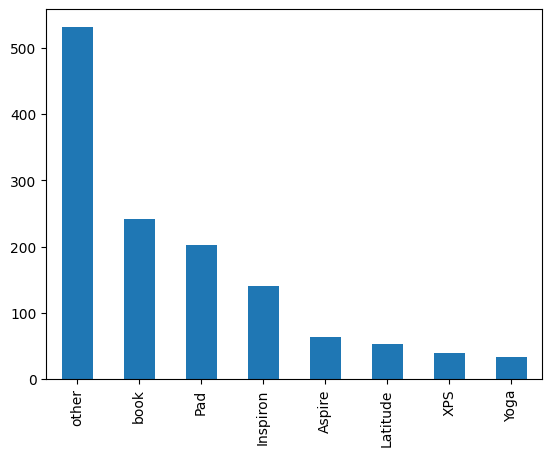

In [20]:
df['Product_class'].value_counts().plot(kind='bar')

In [21]:
a.head(60)

other       532
book        241
Pad         202
Inspiron    141
Aspire       63
Latitude     52
XPS          39
Yoga         33
Name: Product_class, dtype: int64

In [22]:
1303-532

771

In [23]:
(771/1303)*100

59.171143514965465

Around **60%** of data of **Product** column is unrevealed within **other** class

<AxesSubplot: xlabel='Product_class', ylabel='Price_euros'>

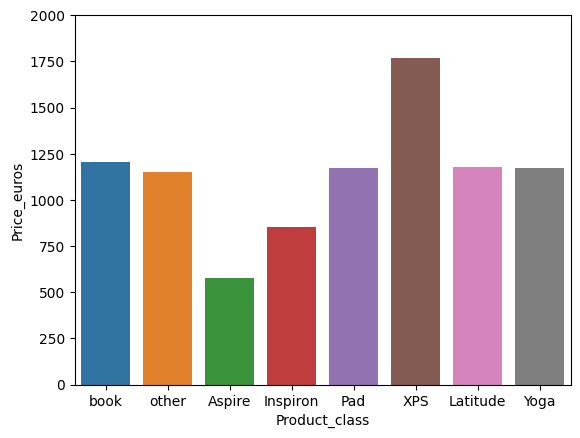

In [24]:
sns.barplot(x=df['Product_class'],y=df['Price_euros'],errwidth=0)

This types of classification can bring bias for the model

**TypeName vs Price_euros**

In [25]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

<AxesSubplot: >

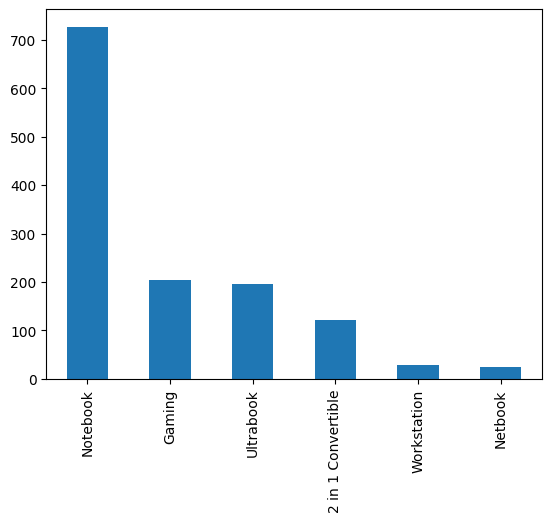

In [26]:
df['TypeName'].value_counts().plot(kind='bar')

**Observation:**  Notebook is sold highest

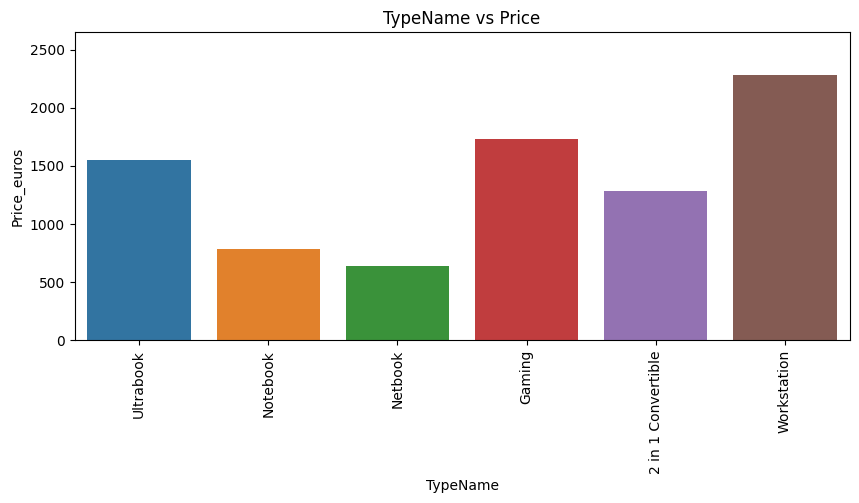

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['TypeName'],y=df['Price_euros'],errwidth=0)
plt.title('TypeName vs Price')
plt.xticks(rotation='vertical')
plt.show()

**Decision:** Notebook is cheaper than another types

**Inches vs Price_euros**

<AxesSubplot: xlabel='Inches', ylabel='Density'>

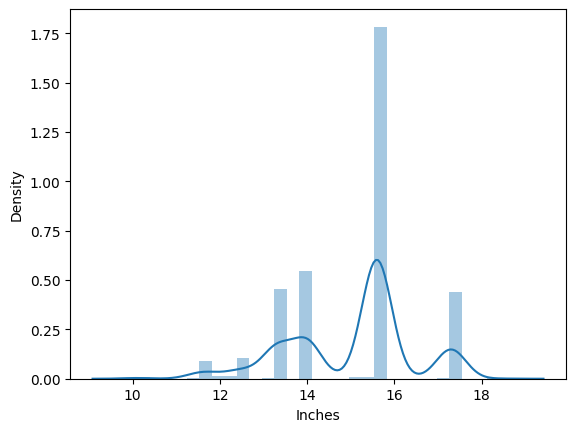

In [28]:
sns.distplot(df['Inches'])

**Observation 1:**  distibution of **Inches** feature has some ups and downs

<AxesSubplot: xlabel='Inches', ylabel='Price_euros'>

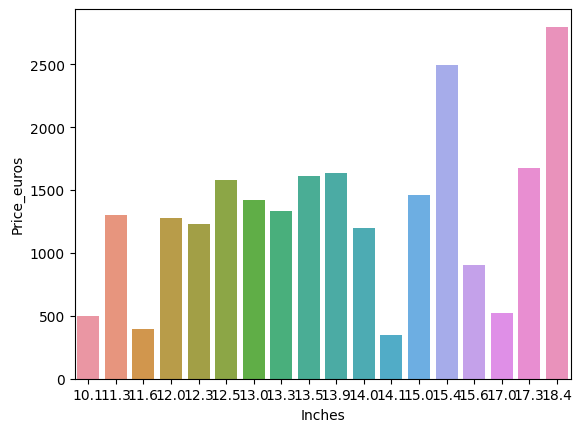

In [29]:
sns.barplot(x=df['Inches'],y=df['Price_euros'],errwidth=0)

**Observation 2:** less inches less price, more inches more price but some times less inches have more price according to 
    quality

<AxesSubplot: xlabel='Inches', ylabel='Price_euros'>

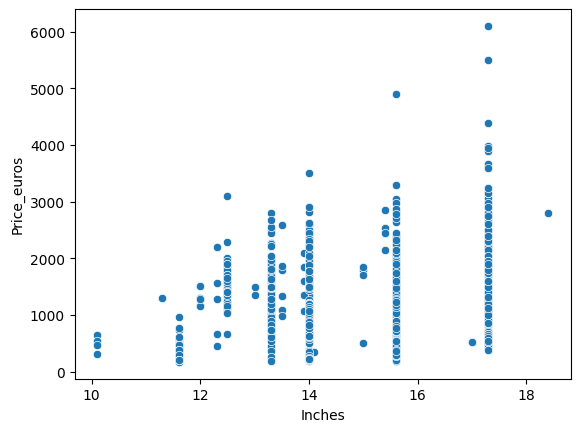

In [30]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

In [31]:
df.corr()['Price_euros']

Inches         0.068197
Price_euros    1.000000
Name: Price_euros, dtype: float64

**Decision:** **Inches** feature has a poor linear relationship with **Price_euros**

# Preprocessing

**Ram** and  **Weight** features are object feature and they have some extenstion like **GB kg** . We have to remove extensions 
and transfer feature from object to neumeric

In [32]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [33]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,book
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,other
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,other
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,book
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,book


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
 12  Product_class     1303 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 127.4+ KB


In [35]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [36]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [37]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

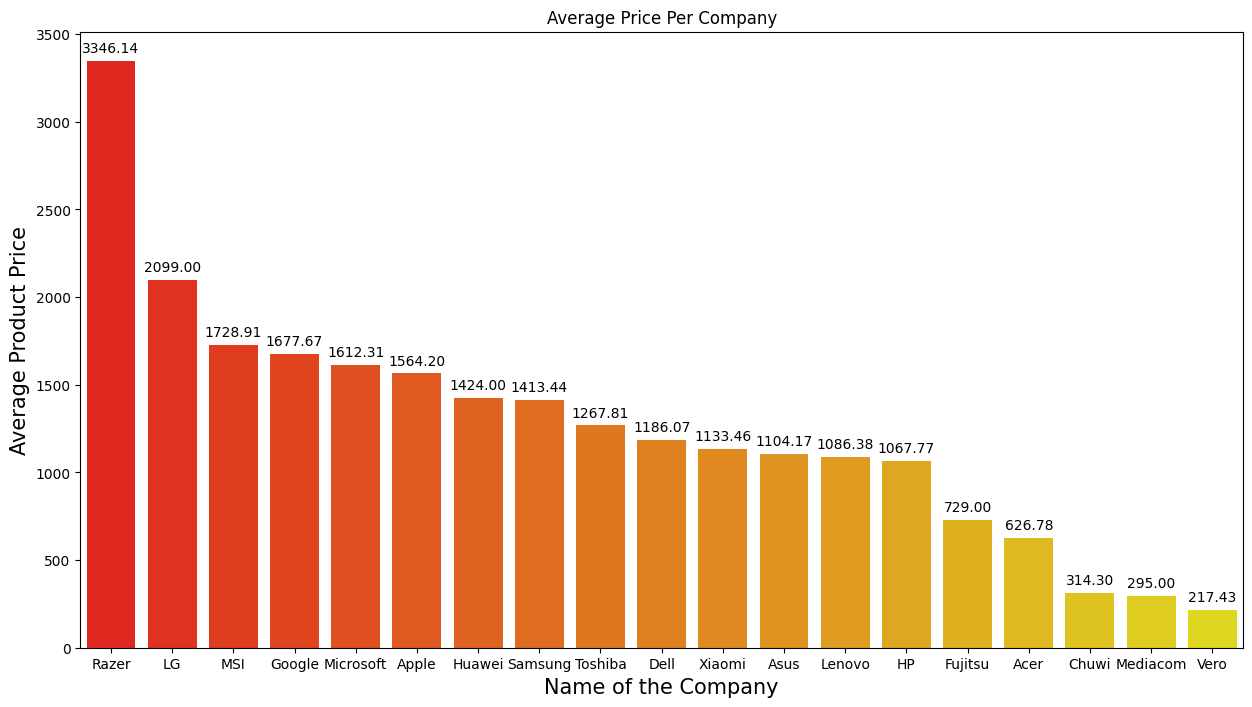

In [38]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

In [39]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Name: Price_euros, dtype: float64

<AxesSubplot: xlabel='Ram', ylabel='Price_euros'>

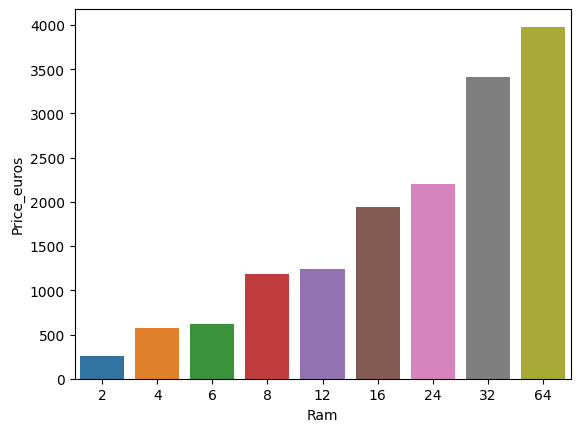

In [40]:
sns.barplot(x=df['Ram'],y=df['Price_euros'],errwidth=0)

<AxesSubplot: xlabel='Ram', ylabel='Density'>

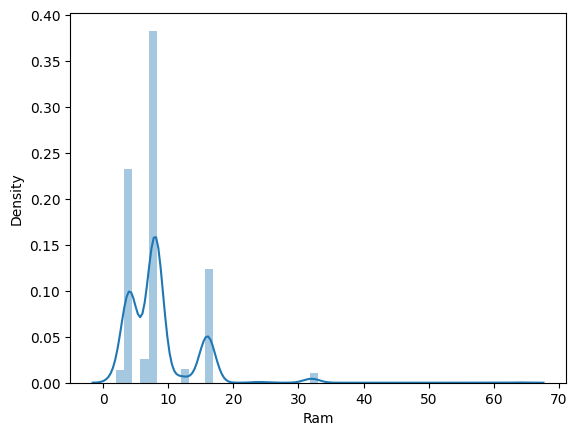

In [41]:
sns.distplot(df['Ram'])

<AxesSubplot: xlabel='Ram', ylabel='Price_euros'>

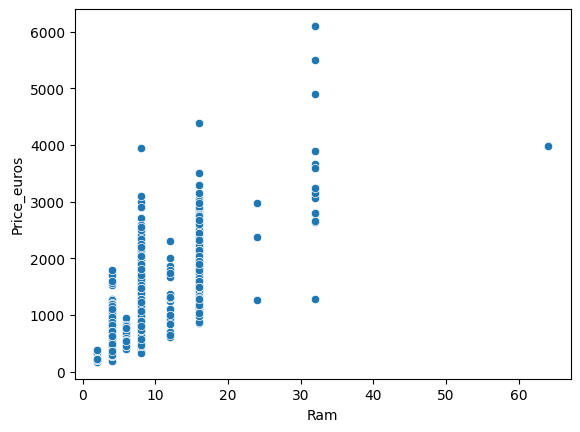

In [42]:
sns.scatterplot(x=df['Ram'],y=df['Price_euros'])

<AxesSubplot: xlabel='Weight', ylabel='Density'>

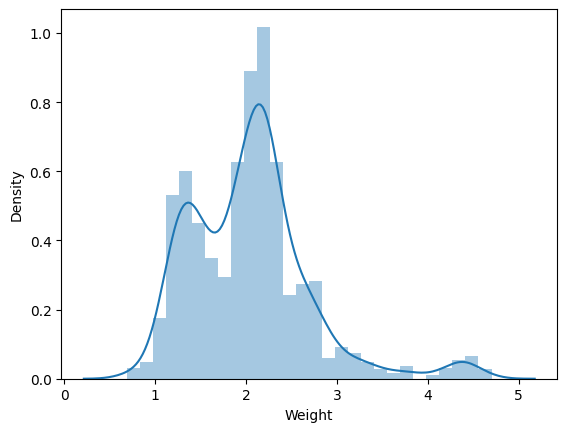

In [43]:
sns.distplot(df['Weight'])

<AxesSubplot: xlabel='Weight', ylabel='Price_euros'>

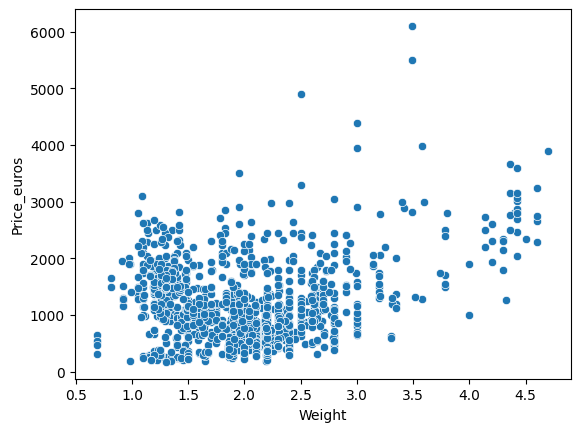

In [44]:
sns.scatterplot(x=df['Weight'],y=df['Price_euros'])

In [45]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,book
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,other
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,other
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,book
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,book


In [46]:
df.drop(columns=['Product'],inplace=True)

In [47]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,book
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,other
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,other
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,book
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,book


In [48]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [49]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

<AxesSubplot: >

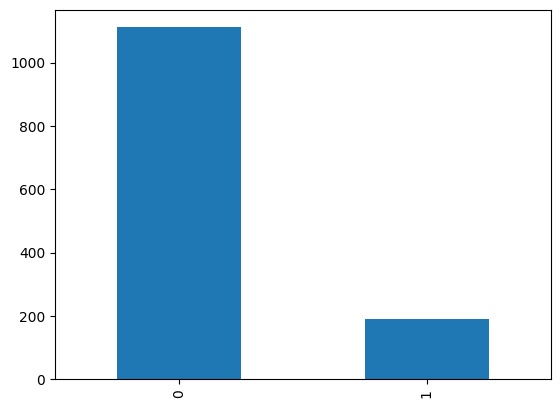

In [50]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Touchscreen', ylabel='Price_euros'>

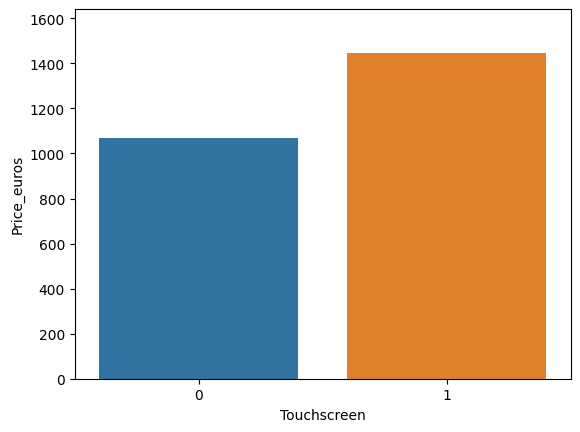

In [51]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'],errwidth=0)

In [52]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Name: Price_euros, dtype: float64

In [53]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<AxesSubplot: >

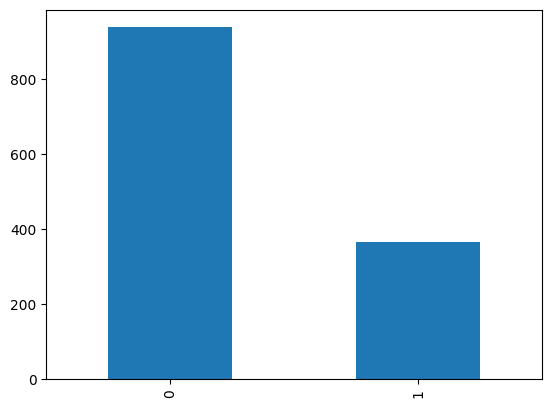

In [54]:
df['IPS'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='IPS', ylabel='Price_euros'>

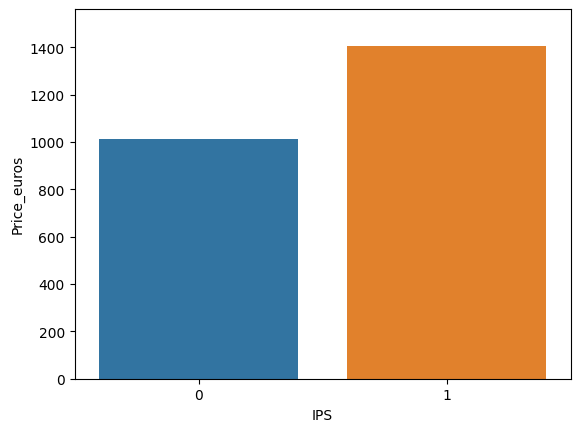

In [55]:
sns.barplot(x=df['IPS'],y=df['Price_euros'],errwidth=0)

In [56]:
df['HD']=df['ScreenResolution'].apply(lambda x: 1 if 'HD' in x else 0)

<AxesSubplot: >

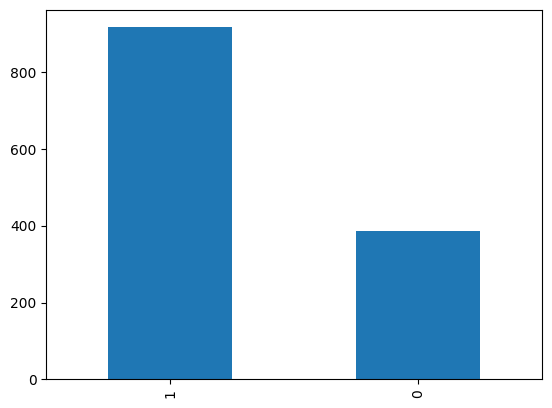

In [57]:
df['HD'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='HD', ylabel='Price_euros'>

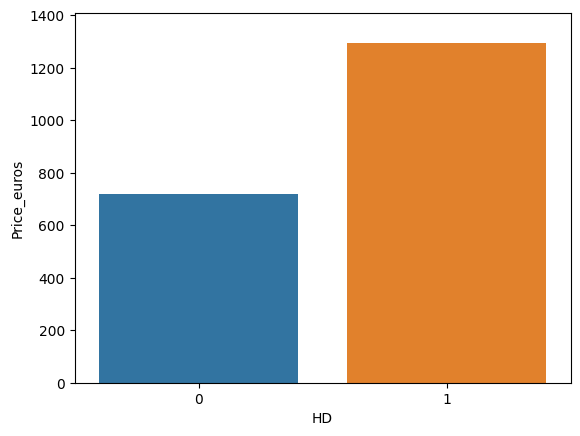

In [58]:
sns.barplot(x=df['HD'],y=df['Price_euros'],errwidth=0)

In [59]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [60]:
a = df['ScreenResolution'].str.split('x')
a

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [61]:
df['Resulation_height']=df['ScreenResolution'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0]).astype(int)
df['Resulation_height']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: Resulation_height, Length: 1303, dtype: int32

In [62]:
df['Resulation_width']=df['ScreenResolution'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0]).astype(int)
df['Resulation_width']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: Resulation_width, Length: 1303, dtype: int32

In [63]:
df.corr()['Price_euros']

Inches               0.068197
Ram                  0.743007
Weight               0.210370
Price_euros          1.000000
Touchscreen          0.191226
IPS                  0.252208
HD                   0.377209
Resulation_height    0.556529
Resulation_width     0.556529
Name: Price_euros, dtype: float64

In [64]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width
845,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,739.0,other,0,0,1,1920,1920
956,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.24,1899.0,XPS,1,0,1,1920,1920
103,HP,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38,1119.0,other,0,1,1,1920,1920
578,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,2729.0,other,0,0,1,1920,1920
519,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX1050 Ti,Windows 10,3.00,1504.0,other,0,0,1,1920,1920


In [65]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [66]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width
1217,Lenovo,Notebook,17.3,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,No OS,2.80,539.0,Pad,0,0,0,1600,1600
81,Apple,Ultrabook,12.0,Intel Core i5 1.3GHz,8,512GB SSD,Intel HD Graphics 615,macOS,0.92,1510.0,book,0,1,0,2304,2304
1249,Dell,2 in 1 Convertible,13.3,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.24,1813.0,XPS,1,0,1,3200,3200
915,Lenovo,Notebook,13.3,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.44,881.0,Pad,0,0,1,1920,1920
348,Asus,2 in 1 Convertible,11.6,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,375.0,book,1,0,0,1366,1366


In [67]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [68]:
df[['Cpu_Core','Cpu_Capacity_GHz']] = df['Cpu'].str.rsplit(" ", n=1, expand=True)

In [69]:
df['Cpu_Capacity_GHz']

0       2.3GHz
1       1.8GHz
2       2.5GHz
3       2.7GHz
4       3.1GHz
         ...  
1298    2.5GHz
1299    2.5GHz
1300    1.6GHz
1301    2.5GHz
1302    1.6GHz
Name: Cpu_Capacity_GHz, Length: 1303, dtype: object

In [70]:
df["Cpu_Capacity_GHz"] = df["Cpu_Capacity_GHz"].str.replace("GHz","")
df["Cpu_Capacity_GHz"] = pd.to_numeric(df["Cpu_Capacity_GHz"])

<AxesSubplot: xlabel='Cpu_Capacity_GHz', ylabel='Density'>

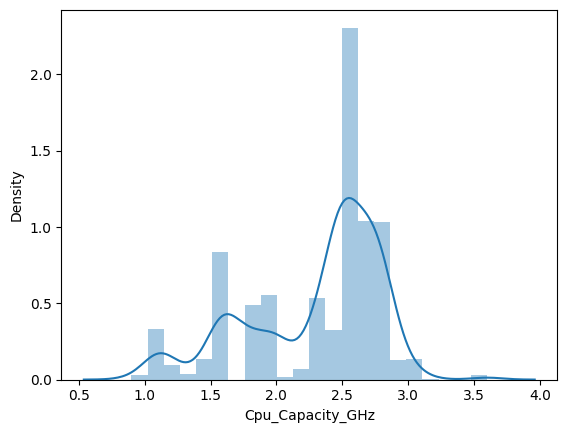

In [71]:
sns.distplot(df['Cpu_Capacity_GHz'])

In [72]:
df['Cpu Name'] = df['Cpu_Core'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width,Cpu_Core,Cpu_Capacity_GHz,Cpu Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,book,0,1,0,2560,2560,Intel Core i5,2.3,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,other,0,0,0,1440,1440,Intel Core i5,1.8,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,other,0,0,1,1920,1920,Intel Core i5 7200U,2.5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,book,0,1,0,2880,2880,Intel Core i7,2.7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,book,0,1,0,2560,2560,Intel Core i5,3.1,Intel Core i5


In [73]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [74]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width,Cpu_Core,Cpu_Capacity_GHz,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,book,0,1,0,2560,2560,Intel Core i5,2.3,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,other,0,0,0,1440,1440,Intel Core i5,1.8,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,other,0,0,1,1920,1920,Intel Core i5 7200U,2.5,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,book,0,1,0,2880,2880,Intel Core i7,2.7,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,book,0,1,0,2560,2560,Intel Core i5,3.1,Intel Core i5,Intel Core i5


<AxesSubplot: >

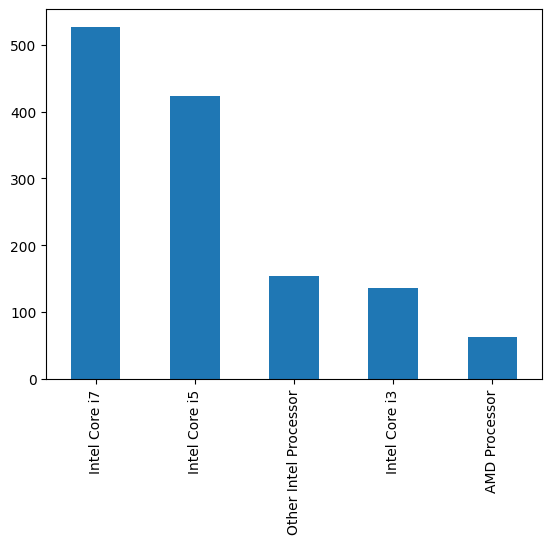

In [75]:
df['Cpu brand'].value_counts().plot(kind='bar')

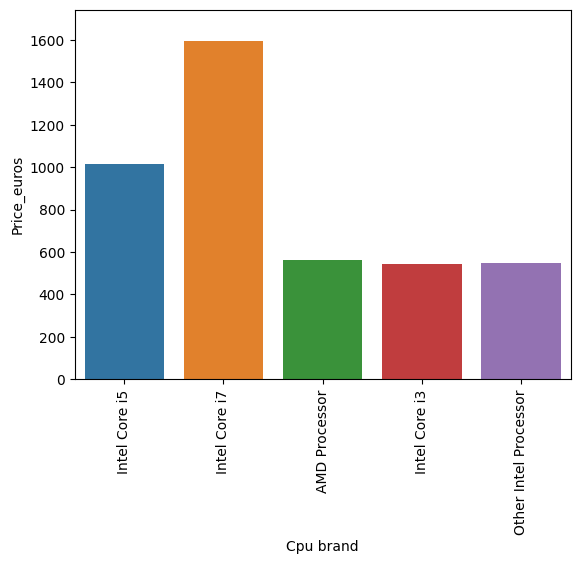

In [76]:
sns.barplot(x=df['Cpu brand'],y=df['Price_euros'],errwidth=0)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [78]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width,Cpu_Core,Cpu_Capacity_GHz,Cpu brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,book,0,1,0,2560,2560,Intel Core i5,2.3,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,other,0,0,0,1440,1440,Intel Core i5,1.8,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,other,0,0,1,1920,1920,Intel Core i5 7200U,2.5,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,book,0,1,0,2880,2880,Intel Core i7,2.7,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,book,0,1,0,2560,2560,Intel Core i5,3.1,Intel Core i5


In [79]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [80]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [81]:
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)
new.sample(5)

,0,1
1260,128 SSD,None
282,256 SSD,None
450,128 SSD,None
934,128 SSD,None
17,512 SSD,None


In [82]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["first"]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [83]:
df["second"]= new[1]
df["second"].sample(5)

1284    None
1057    None
1127    None
690     None
751     None
Name: second, dtype: object

In [84]:

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df.sample(5)


,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class,...,Resulation_width,Cpu_Core,Cpu_Capacity_GHz,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
627,Lenovo,Notebook,15.6,4,128 SSD,Intel HD Graphics 620,No OS,2.20,468.00,Pad,...,1920,Intel Core i5 7200U,2.5,Intel Core i5,128 SSD,None,0,1,0,0
709,HP,Notebook,17.3,6,2000 HDD,AMD Radeon 530,Windows 10,2.71,655.01,other,...,1920,AMD A10-Series 9620P,2.5,AMD Processor,2000 HDD,None,1,0,0,0
256,HP,Notebook,15.6,8,128 SSD,AMD Radeon R4 Graphics,Windows 10,1.91,445.90,other,...,1366,AMD A6-Series A6-9220,2.5,AMD Processor,128 SSD,None,0,1,0,0
1019,HP,Notebook,14.0,8,256 SSD,Intel HD Graphics 520,Windows 10,1.43,2229.00,book,...,1920,Intel Core i7 6500U,2.5,Intel Core i7,256 SSD,None,0,1,0,0
902,Dell,2 in 1 Convertible,13.3,16,256 SSD,Intel HD Graphics 615,Windows 10,1.22,1649.00,XPS,...,1920,Intel Core i7 7Y75,1.3,Intel Core i7,256 SSD,None,0,1,0,0


In [85]:
df['first'] = df['first'].str.replace(r'\D', '')
df['first'].head(5)

0    128
1    128
2    256
3    512
4    256
Name: first, dtype: object

In [86]:
df["second"].fillna("0", inplace = True)
df.head(10)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_class,...,Resulation_width,Cpu_Core,Cpu_Capacity_GHz,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,book,...,2560,Intel Core i5,2.3,Intel Core i5,128,0,0,1,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,other,...,1440,Intel Core i5,1.8,Intel Core i5,128,0,0,0,0,1
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,other,...,1920,Intel Core i5 7200U,2.5,Intel Core i5,256,0,0,1,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,book,...,2880,Intel Core i7,2.7,Intel Core i7,512,0,0,1,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,book,...,2560,Intel Core i5,3.1,Intel Core i5,256,0,0,1,0,0
5,Acer,Notebook,15.6,4,500 HDD,AMD Radeon R5,Windows 10,2.10,400.00,Aspire,...,1366,AMD A9-Series 9420,3.0,AMD Processor,500,0,1,0,0,0
6,Apple,Ultrabook,15.4,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,book,...,2880,Intel Core i7,2.2,Intel Core i7,256,0,0,0,0,1
7,Apple,Ultrabook,13.3,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,1158.70,other,...,1440,Intel Core i5,1.8,Intel Core i5,256,0,0,0,0,1
8,Asus,Ultrabook,14.0,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00,book,...,1920,Intel Core i7 8550U,1.8,Intel Core i7,512,0,0,1,0,0
9,Acer,Ultrabook,14.0,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,770.00,other,...,1920,Intel Core i5 8250U,1.6,Intel Core i5,256,0,0,1,0,0


In [87]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [88]:
df['second'] = df['second'].str.replace(r'\D', '')
df['second'].sample(5)

672     0
504     0
934     0
1265    0
963     0
Name: second, dtype: object

In [89]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [90]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [91]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<AxesSubplot: xlabel='Hybrid', ylabel='Density'>

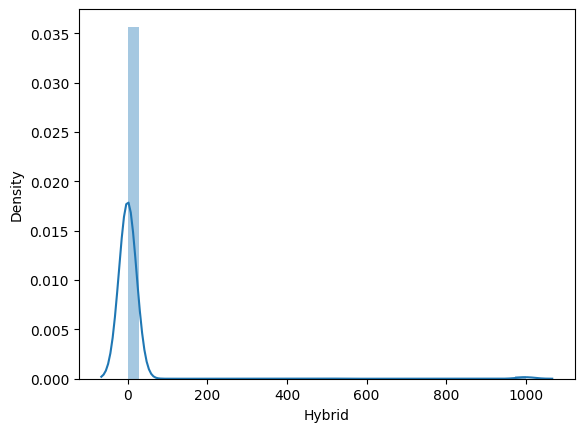

In [92]:
sns.distplot(df['Hybrid'])

In [93]:
df['Hybrid'].value_counts()

0       1291
1000      11
508        1
Name: Hybrid, dtype: int64

<AxesSubplot: xlabel='Flash_Storage', ylabel='Density'>

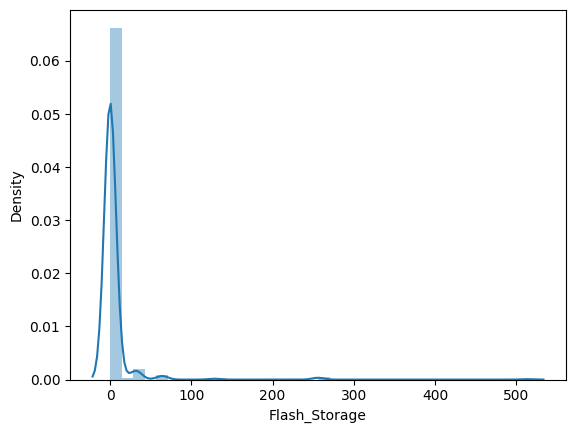

In [94]:
sns.distplot(df['Flash_Storage'])

In [95]:
df['Flash_Storage'].value_counts()

0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

<AxesSubplot: xlabel='HDD', ylabel='Density'>

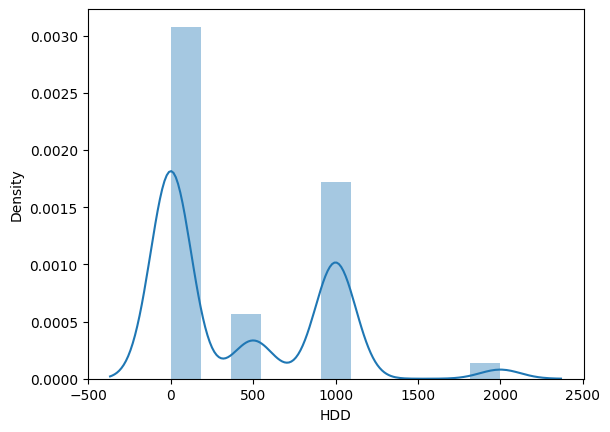

In [96]:
sns.distplot(df['HDD'])

In [97]:
df['HDD'].value_counts()

0       727
1000    408
500     134
2000     32
32        1
128       1
Name: HDD, dtype: int64

<AxesSubplot: xlabel='SSD', ylabel='Density'>

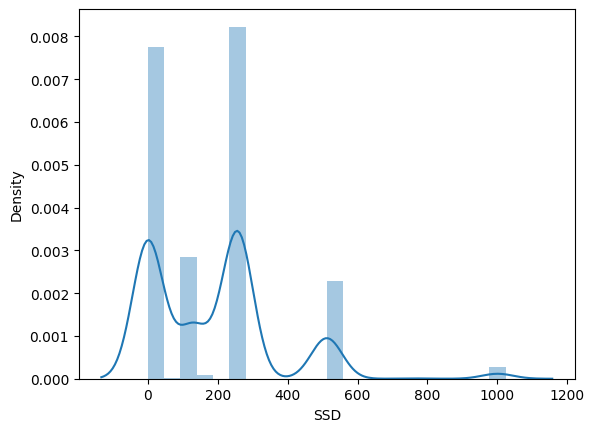

In [98]:
sns.distplot(df['SSD'])

In [99]:
df['SSD'].value_counts()

256     498
0       460
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

In [100]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Product_class,Touchscreen,...,HD,Resulation_height,Resulation_width,Cpu_Core,Cpu_Capacity_GHz,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,book,0,...,0,2560,2560,Intel Core i5,2.3,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,other,0,...,0,1440,1440,Intel Core i5,1.8,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,other,0,...,1,1920,1920,Intel Core i5 7200U,2.5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,book,0,...,0,2880,2880,Intel Core i7,2.7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,book,0,...,0,2560,2560,Intel Core i5,3.1,Intel Core i5,0,256,0,0


In [101]:
df.drop(columns=['Cpu_Core'],inplace=True)
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width,Cpu_Capacity_GHz,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,book,0,1,0,2560,2560,2.3,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,other,0,0,0,1440,1440,1.8,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,other,0,0,1,1920,1920,2.5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,book,0,1,0,2880,2880,2.7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,book,0,1,0,2560,2560,3.1,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,638.00,Yoga,1,1,1,1920,1920,2.5,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,Yoga,1,1,1,3200,3200,2.5,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,229.00,Pad,0,0,0,1366,1366,1.6,Other Intel Processor,0,0,0,64
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,other,0,0,0,1366,1366,2.5,Intel Core i7,1000,0,0,0


In [102]:
df['Gpu'].value_counts()


Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, Length: 106, dtype: int64

In [103]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [104]:
df = df[df['Gpu brand'] != 'ARM']
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

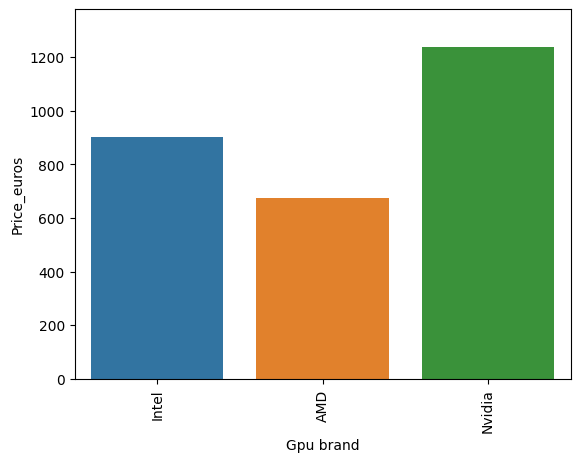

In [105]:
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'],estimator=np.median,errwidth=0)
plt.xticks(rotation='vertical')
plt.show()

In [106]:
df['Gpu'].sample(5)

604       AMD Radeon R5 M420
490     Nvidia GeForce 940MX
568    Intel HD Graphics 505
777    Intel HD Graphics 620
202     Nvidia GeForce 940MX
Name: Gpu, dtype: object

In [107]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width,Cpu_Capacity_GHz,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,book,0,1,0,2560,2560,2.3,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,other,0,0,0,1440,1440,1.8,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,No OS,1.86,575.00,other,0,0,1,1920,1920,2.5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,book,0,1,0,2880,2880,2.7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,book,0,1,0,2560,2560,3.1,Intel Core i5,0,256,0,0,Intel


In [108]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

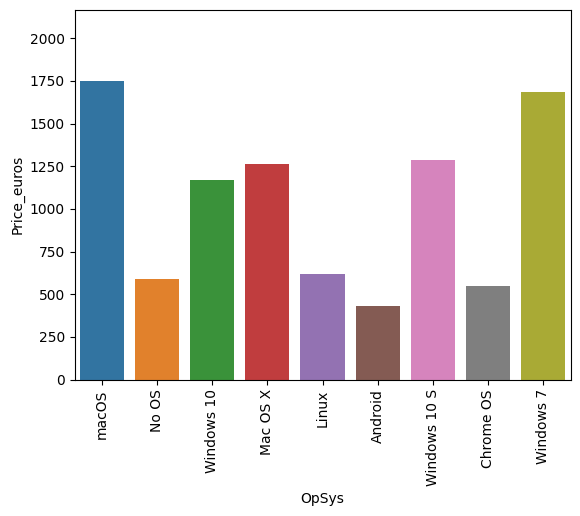

In [109]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'],errwidth=0)
plt.xticks(rotation='vertical')
plt.show()

In [110]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [111]:
df['os'] = df['OpSys'].apply(cat_os)
df['os'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

In [112]:
df.drop(columns=['OpSys'],inplace=True)

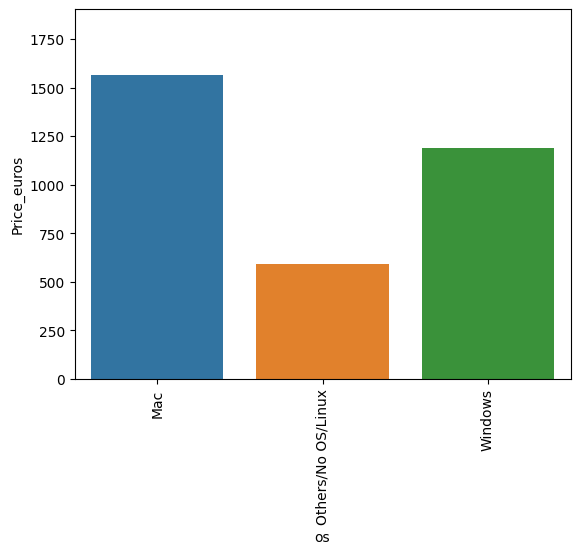

In [113]:
sns.barplot(x=df['os'],y=df['Price_euros'],errwidth=0)
plt.xticks(rotation='vertical')
plt.show()

In [114]:
df.corr()['Price_euros']

Inches               0.067329
Ram                  0.742905
Weight               0.209867
Price_euros          1.000000
Touchscreen          0.192917
IPS                  0.253320
HD                   0.376830
Resulation_height    0.557369
Resulation_width     0.557369
Cpu_Capacity_GHz     0.430122
HDD                 -0.096891
SSD                  0.670660
Hybrid               0.007942
Flash_Storage       -0.040067
Name: Price_euros, dtype: float64

<AxesSubplot: >

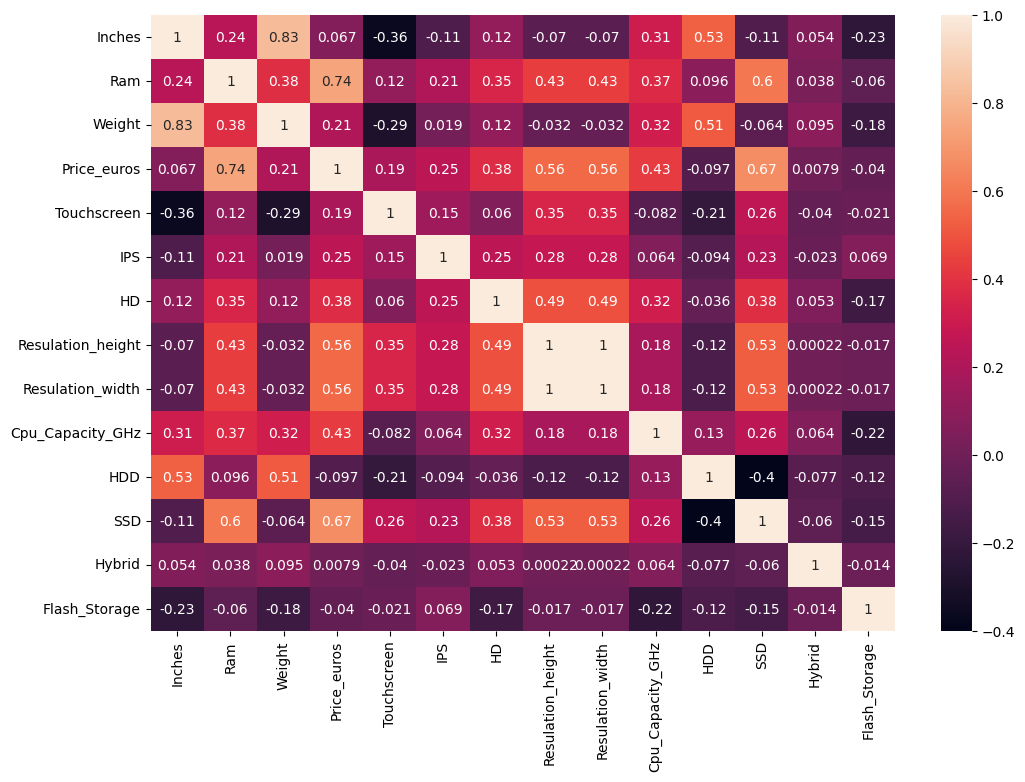

In [115]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='Price_euros', ylabel='Density'>

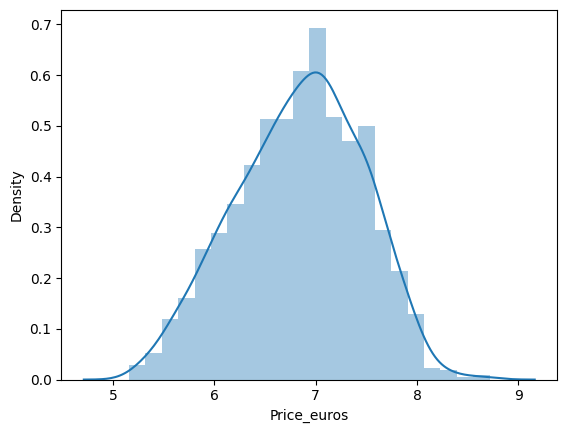

In [116]:
sns.distplot(np.log(df['Price_euros']))

In [117]:
x = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

In [118]:
x.sample(5)

,Company,TypeName,Inches,Ram,Weight,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width,Cpu_Capacity_GHz,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
391,Asus,Gaming,17.3,16,3.00,other,0,0,1,1920,1920,2.8,Intel Core i7,1000,256,0,0,Nvidia,Windows
388,Dell,Workstation,15.6,8,2.00,other,0,1,1,1920,1920,2.7,Intel Core i7,0,256,0,0,Nvidia,Windows
772,Toshiba,Notebook,14.0,4,1.75,other,0,1,0,1366,1366,2.3,Intel Core i5,0,128,0,0,Intel,Windows
465,Asus,Notebook,15.6,4,2.00,other,0,0,0,1366,1366,1.1,Other Intel Processor,500,0,0,0,Intel,Windows
170,Huawei,Ultrabook,13.0,8,1.05,other,0,1,1,2160,2160,2.5,Intel Core i5,0,256,0,0,Intel,Windows


In [119]:
y.head()

0    7.200194
1    6.801216
2    6.354370
3    7.838915
4    7.497540
Name: Price_euros, dtype: float64

In [120]:
x.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'Product_class',
       'Touchscreen', 'IPS', 'HD', 'Resulation_height', 'Resulation_width',
       'Cpu_Capacity_GHz', 'Cpu brand', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage', 'Gpu brand', 'os'],
      dtype='object')

In [121]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   TypeName           1302 non-null   object 
 2   Inches             1302 non-null   float64
 3   Ram                1302 non-null   int32  
 4   Weight             1302 non-null   float64
 5   Product_class      1302 non-null   object 
 6   Touchscreen        1302 non-null   int64  
 7   IPS                1302 non-null   int64  
 8   HD                 1302 non-null   int64  
 9   Resulation_height  1302 non-null   int32  
 10  Resulation_width   1302 non-null   int32  
 11  Cpu_Capacity_GHz   1302 non-null   float64
 12  Cpu brand          1302 non-null   object 
 13  HDD                1302 non-null   int64  
 14  SSD                1302 non-null   int64  
 15  Hybrid             1302 non-null   int64  
 16  Flash_Storage      1302 

# Feature Engineering

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [123]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price_euros,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width,Cpu_Capacity_GHz,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,13.3,8,1.37,1339.69,book,0,1,0,2560,2560,2.3,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,898.94,other,0,0,0,1440,1440,1.8,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,15.6,8,1.86,575.00,other,0,0,1,1920,1920,2.5,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,2537.45,book,0,1,0,2880,2880,2.7,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,1803.60,book,0,1,0,2560,2560,3.1,Intel Core i5,0,256,0,0,Intel,Mac


In [124]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'Price_euros',
       'Product_class', 'Touchscreen', 'IPS', 'HD', 'Resulation_height',
       'Resulation_width', 'Cpu_Capacity_GHz', 'Cpu brand', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage', 'Gpu brand', 'os'],
      dtype='object')

In [125]:
clt = ColumnTransformer([('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,5,12,17,18])],
                        remainder='passthrough',verbose_feature_names_out=False)

In [126]:
x.head()

,Company,TypeName,Inches,Ram,Weight,Product_class,Touchscreen,IPS,HD,Resulation_height,Resulation_width,Cpu_Capacity_GHz,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,13.3,8,1.37,book,0,1,0,2560,2560,2.3,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,other,0,0,0,1440,1440,1.8,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,15.6,8,1.86,other,0,0,1,1920,1920,2.5,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,book,0,1,0,2880,2880,2.7,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,book,0,1,0,2560,2560,3.1,Intel Core i5,0,256,0,0,Intel,Mac


In [127]:
x = clt.fit_transform(x)
x

array([[  0.,   1.,   0., ..., 128.,   0.,   0.],
       [  0.,   1.,   0., ...,   0.,   0., 128.],
       [  0.,   0.,   0., ..., 256.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  64.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.]])

In [128]:
x = pd.DataFrame(x,columns=clt.get_feature_names_out())
x

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,Touchscreen,IPS,HD,Resulation_height,Resulation_width,Cpu_Capacity_GHz,HDD,SSD,Hybrid,Flash_Storage
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2560.0,2560.0,2.3,0.0,128.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1440.0,1440.0,1.8,0.0,0.0,0.0,128.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1920.0,1920.0,2.5,0.0,256.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2880.0,2880.0,2.7,0.0,512.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2560.0,2560.0,3.1,0.0,256.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1920.0,1920.0,2.5,0.0,128.0,0.0,0.0
1298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,3200.0,3200.0,2.5,0.0,512.0,0.0,0.0
1299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1366.0,1366.0,1.6,0.0,0.0,0.0,64.0
1300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1366.0,1366.0,2.5,1000.0,0.0,0.0,0.0


# Dataset split into train and test

In [129]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=2)

# Modelling

In [130]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [131]:
lr = LinearRegression()
R = Ridge(alpha=10)
las = Lasso(alpha=0.001)
neigh = KNeighborsRegressor(n_neighbors=3)
dtr = DecisionTreeRegressor(max_depth=8)
svr = SVR(kernel='rbf',C=10000,epsilon=0.1)
rfr = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
xtr = ExtraTreesRegressor()
ada = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
gbr = GradientBoostingRegressor(n_estimators=500)
xgbr= XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)


In [132]:
def model(xtrain,ytrain,xtest,ytest):
    model_name=['LinearRegression','Ridge','Lasso','KNeighborsRegressor','DecisionTreeRegressor','SVR','RandomForestRegressor','ExtraTreesRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']
    train_accuracy=[]
    test_accuracy=[]
    #LogisticRegression
    lr.fit(xtrain,ytrain)
    test_accuracy.append(lr.score(xtest,ytest))
    train_accuracy.append(lr.score(xtrain,ytrain))
    #Ridge
    R.fit(xtrain,ytrain)
    test_accuracy.append(R.score(xtest,ytest))
    train_accuracy.append(R.score(xtrain,ytrain))
    
    #Lasso
    las.fit(xtrain,ytrain)
    test_accuracy.append(las.score(xtest,ytest))
    train_accuracy.append(las.score(xtrain,ytrain))
    #KNeighborsRegressor
    neigh.fit(xtrain,ytrain)
    test_accuracy.append(neigh.score(xtest,ytest))
    train_accuracy.append(neigh.score(xtrain,ytrain))

    #DecisionTreeRegressor
    dtr.fit(xtrain,ytrain)
    test_accuracy.append(dtr.score(xtest,ytest))
    train_accuracy.append(dtr.score(xtrain,ytrain))
    #SVR
    svr.fit(xtrain,ytrain)
    test_accuracy.append(svr.score(xtest,ytest))
    train_accuracy.append(svr.score(xtrain,ytrain))
    #RandomForestRegressor
    rfr.fit(xtrain,ytrain)
    test_accuracy.append(rfr.score(xtest,ytest))
    train_accuracy.append(rfr.score(xtrain,ytrain))
    
    #ExtraTreesRegressor
    xtr.fit(xtrain,ytrain)
    test_accuracy.append(xtr.score(xtest,ytest))
    train_accuracy.append(xtr.score(xtrain,ytrain))
    
    #AdaBoostRegressor
    ada.fit(xtrain,ytrain)
    test_accuracy.append(ada.score(xtest,ytest))
    train_accuracy.append(ada.score(xtrain,ytrain))
    

    #GradientBoostingRegressor
    gbr.fit(xtrain,ytrain)
    test_accuracy.append(gbr.score(xtest,ytest))
    train_accuracy.append(gbr.score(xtrain,ytrain))
    
    
    #XGBRegressor
    xgbr.fit(xtrain,ytrain)
    test_accuracy.append(xgbr.score(xtest,ytest))
    train_accuracy.append(xgbr.score(xtrain,ytrain))
    

    
    return model_name,train_accuracy,test_accuracy

In [133]:
model_name,train_accuracy,test_accuracy=model(xtrain,ytrain,xtest,ytest)

# Evaluation

In [134]:
def dataframe(train,test):
    vis={'Algorithm':['LinearRegression','Ridge','Lasso','KNeighborsRegressor','DecisionTreeRegressor','SVR','RandomForestRegressor','ExtraTreesRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor'],
     'Test_accuracy':test,'Train_accuracy':train
         
     
    } 
    accuracy=pd.DataFrame(vis)
    return accuracy

In [135]:
data=dataframe(train_accuracy,test_accuracy)
data

,Algorithm,Test_accuracy,Train_accuracy
0,LinearRegression,0.817147,0.873762
1,Ridge,0.812144,0.863779
2,Lasso,0.812671,0.866296
3,KNeighborsRegressor,0.753549,0.915491
4,DecisionTreeRegressor,0.811511,0.926246
5,SVR,0.803429,0.847256
6,RandomForestRegressor,0.877867,0.961134
7,ExtraTreesRegressor,0.859876,0.998293
8,AdaBoostRegressor,0.802725,0.828773
9,GradientBoostingRegressor,0.895376,0.976626


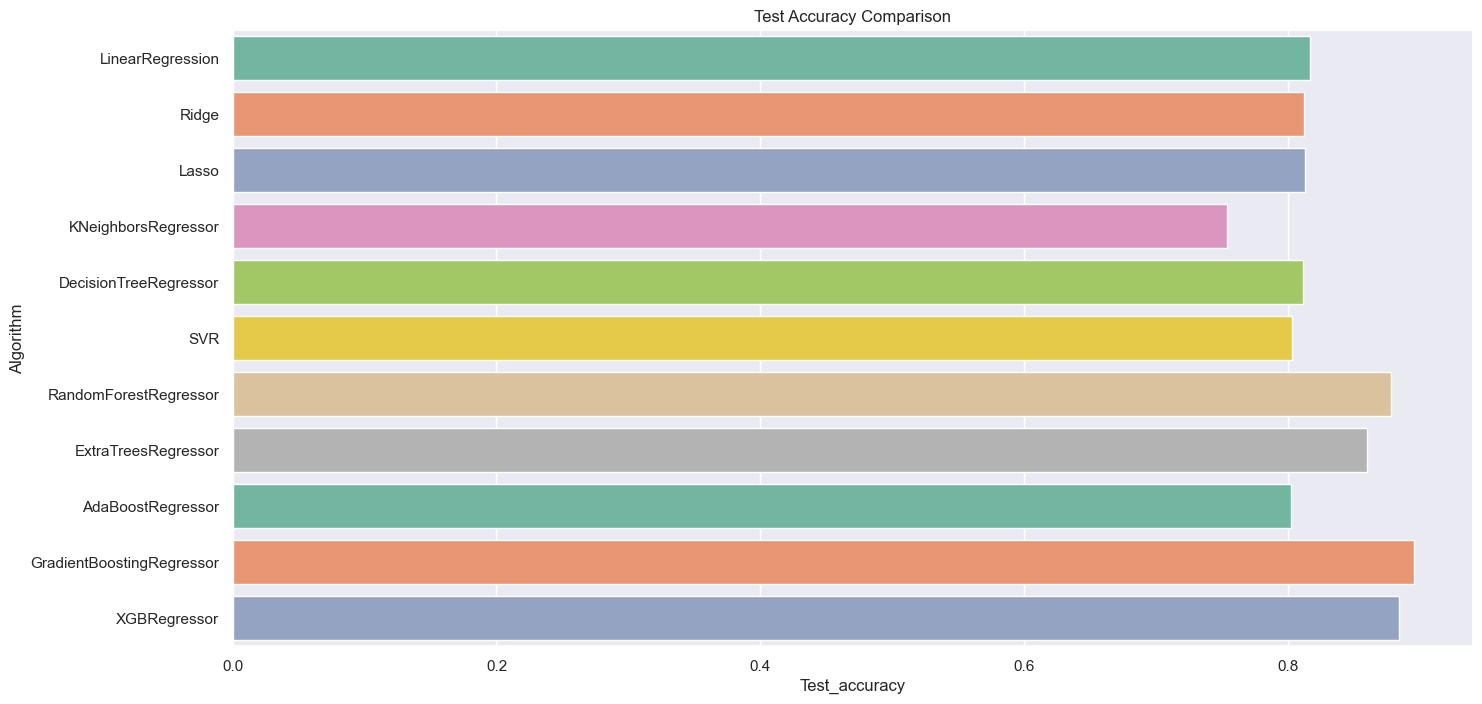

In [136]:
plt.figure(figsize=(16,8))
sns.set()
plt.title('Test Accuracy Comparison')
sns.barplot(y="Algorithm",x='Test_accuracy',data=data,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})

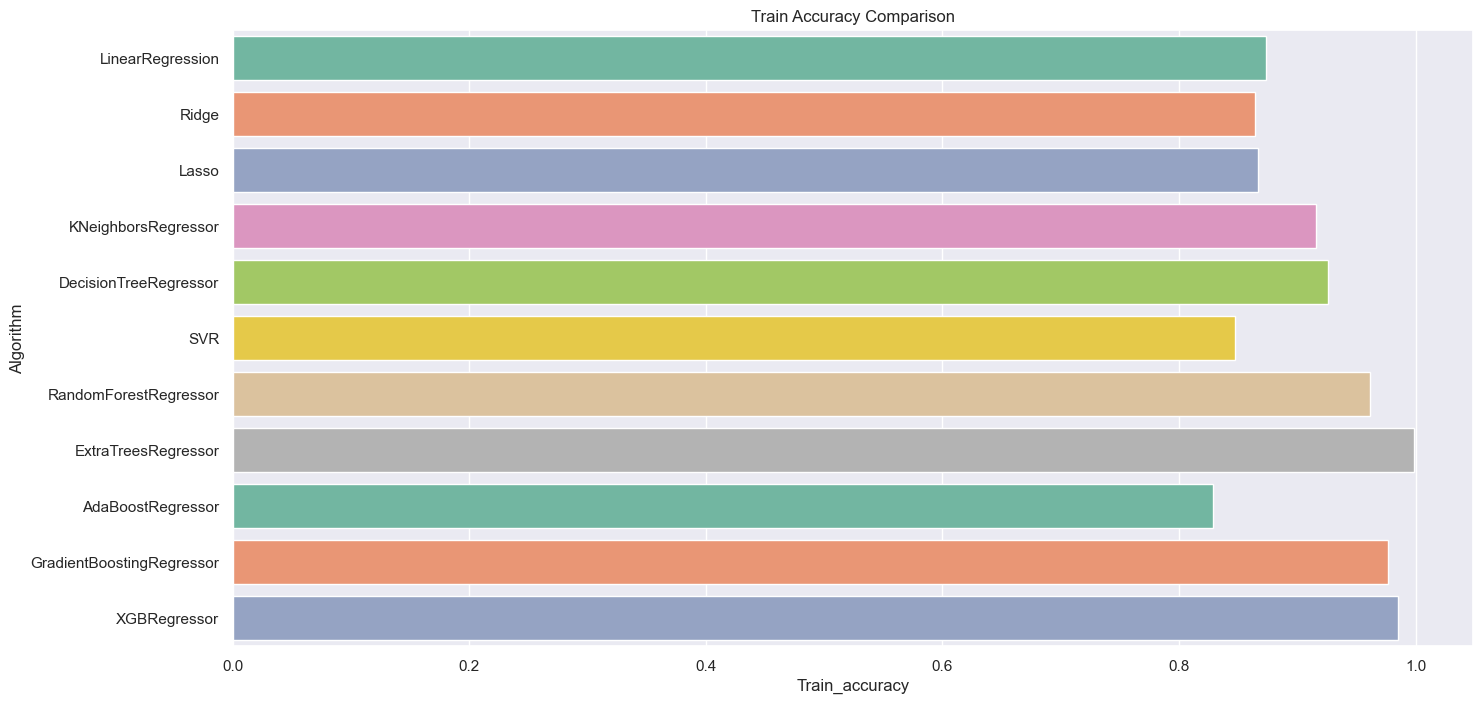

In [137]:
plt.figure(figsize=(16,8))
sns.set()
plt.title('Train Accuracy Comparison')
sns.barplot(y="Algorithm",x='Train_accuracy',data=data,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})

# Model selection

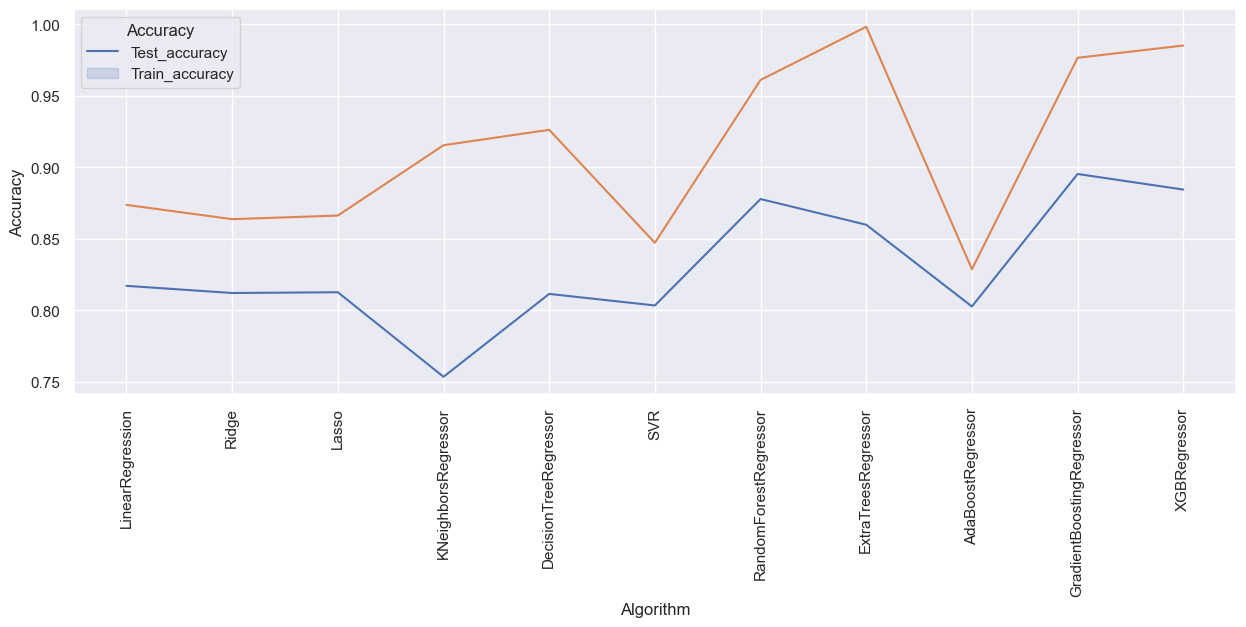

In [139]:
sns.lineplot(data=data, x="Algorithm", y="Test_accuracy")
sns.lineplot(data=data, x="Algorithm", y="Train_accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation='vertical')
plt.legend(labels=["Test_accuracy","Train_accuracy"], title = "Accuracy")
plt.show()

**Best Models:**
*  XGBoost Regression
*  Random Forest Regression
*  Gradient Boosting Regression